### Teste modelo simples de Reg Linear

#### Modelo Simples RM

In [1]:
from ISLP import load_data
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = load_data("Boston")
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


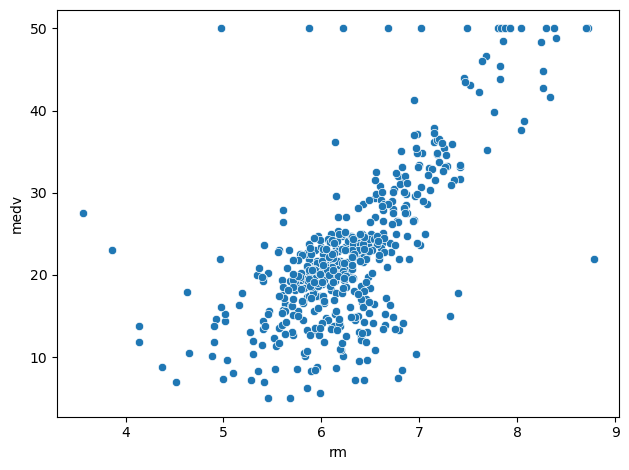

In [3]:
X, y = df["rm"], df["medv"]

sb.scatterplot(x=X, y=y)
plt.tight_layout()
plt.show()

In [4]:
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 17 Jan 2026   Prob (F-statistic):           2.49e-74
Time:                        17:22:01   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

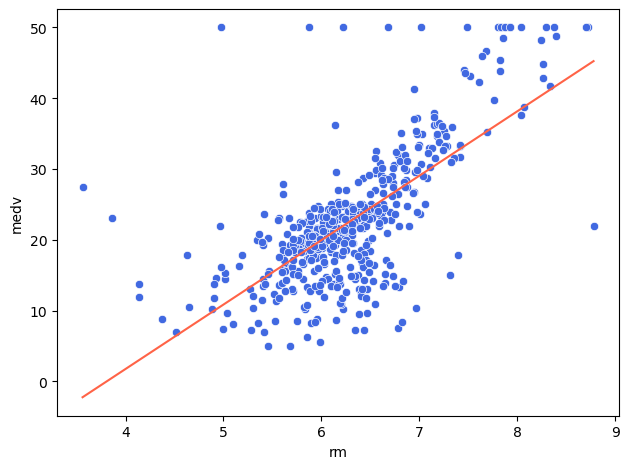

In [5]:
beta_0 = model.params["const"]
beta_1 = model.params["rm"]

x_plot = np.linspace(X.min(), X.max(), 100)
y_plot = beta_0 + beta_1 * x_plot

sb.scatterplot(x=X, y=y, color="royalblue")
plt.plot(x_plot, y_plot, color="tomato")
plt.tight_layout()
plt.show()

#### Modelo Lstat

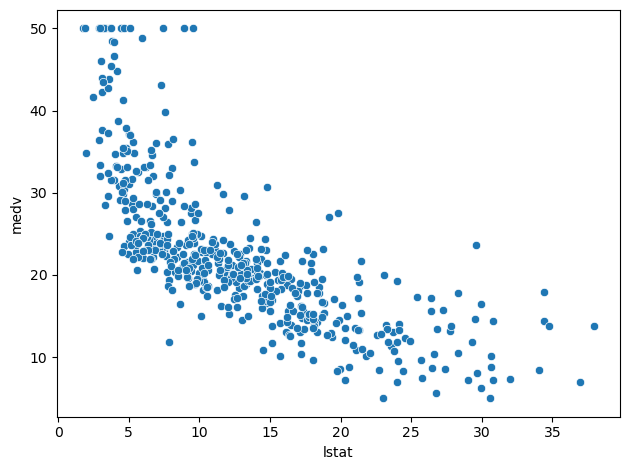

In [6]:
X, y = df["lstat"], df["medv"]
sb.scatterplot(x=X, y=y)
plt.tight_layout()
plt.show()

In [7]:
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 17 Jan 2026   Prob (F-statistic):           5.08e-88
Time:                        17:22:02   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

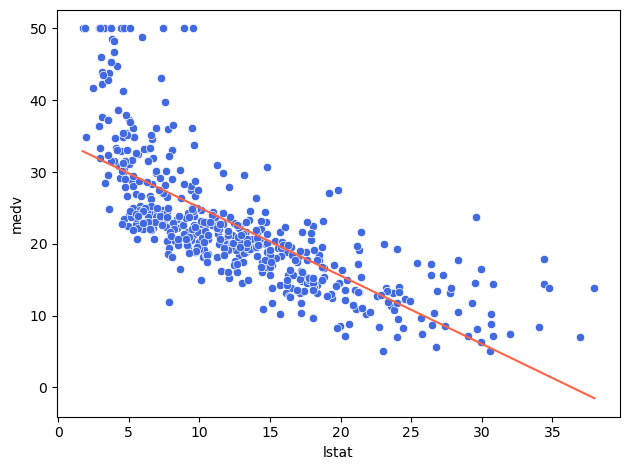

In [8]:
beta_0 = model.params["const"]
beta_1 = model.params["lstat"]

x_plot = np.linspace(X.min(), X.max(), 100)
y_plot = beta_0 + beta_1 * x_plot

sb.scatterplot(x=X, y=y, color="royalblue")
plt.plot(x_plot, y_plot, color="tomato")
plt.tight_layout()
plt.show()

#### Combinando lstat e rm

In [9]:
import plotly.express as px
import plotly.graph_objects as go

X, y = df[["rm", "lstat"]], df["medv"]

fig = px.scatter_3d(
    df,
    x="rm",
    y="lstat",
    z="medv",
    color="medv",
    color_continuous_scale="Viridis",

)
fig.update_traces(marker=dict(size=5))
fig.show()

In [10]:
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sat, 17 Jan 2026   Prob (F-statistic):          7.01e-112
Time:                        17:22:02   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3583      3.173     -0.428      0.6

In [11]:
beta_0 = model.params["const"]
beta_1 = model.params["rm"]
beta_2 = model.params["lstat"]

rm_grid, lstat_grid = np.meshgrid(
    np.linspace(X["rm"].min(), X["rm"].max(), 100),
    np.linspace(X["lstat"].min(), X["lstat"].max(), 100),
)

Z = beta_0 + (beta_1 * rm_grid) + (beta_2 * lstat_grid)

fig = px.scatter_3d(
    df,
    x="rm",
    y="lstat",
    z="medv",
    color="medv",
    color_continuous_scale="Viridis",
    opacity=0.8,
)
fig.update_traces(marker=dict(size=5))


fig.add_trace(
    go.Surface(
        x=rm_grid,
        y=lstat_grid,
        z=Z,
        opacity=0.5,
        showscale=False
    )
)

fig.update_layout(
    scene=dict(
        xaxis_title="rm",
        yaxis_title="lstat",
        zaxis_title="medv"
    )
)

fig.show()

#### Modelo Interação rm x lstat

In [12]:
X = df.loc[:, ["rm", "lstat"]].copy()
X["rm_lstat"] = X["rm"] * X["lstat"]

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     476.9
Date:                Sat, 17 Jan 2026   Prob (F-statistic):          1.75e-146
Time:                        17:22:02   Log-Likelihood:                -1499.2
No. Observations:                 506   AIC:                             3006.
Df Residuals:                     502   BIC:                             3023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -29.1245      3.342     -8.713      0.0

In [13]:
beta_0 = model.params["const"]
beta_1 = model.params["rm"]
beta_2 = model.params["lstat"]
beta_3 = model.params["rm_lstat"]

rm_grid, lstat_grid = np.meshgrid(
    np.linspace(X["rm"].min(), X["rm"].max(), 100),
    np.linspace(X["lstat"].min(), X["lstat"].max(), 100),
)
rm_lstat_grid = rm_grid * lstat_grid

Z = beta_0 + (beta_1 * rm_grid) + (beta_2 * lstat_grid) + (beta_3 * rm_lstat_grid)

fig = px.scatter_3d(
    df,
    x="rm",
    y="lstat",
    z="medv",
    color="medv",
    color_continuous_scale="Viridis",
    opacity=0.8,
)
fig.update_traces(marker=dict(size=5))


fig.add_trace(
    go.Surface(
        x=rm_grid,
        y=lstat_grid,
        z=Z,
        opacity=0.5,
        showscale=False
    )
)

fig.update_layout(
    scene=dict(
        xaxis_title="rm",
        yaxis_title="lstat",
        zaxis_title="medv"
    )
)

fig.show()

#### Avaliando relação polinomial lstat

In [14]:
X = df[["lstat"]].assign(
    lstat_2=lambda x: x["lstat"] ** 2
)


X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sat, 17 Jan 2026   Prob (F-statistic):          1.56e-112
Time:                        17:22:02   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.0

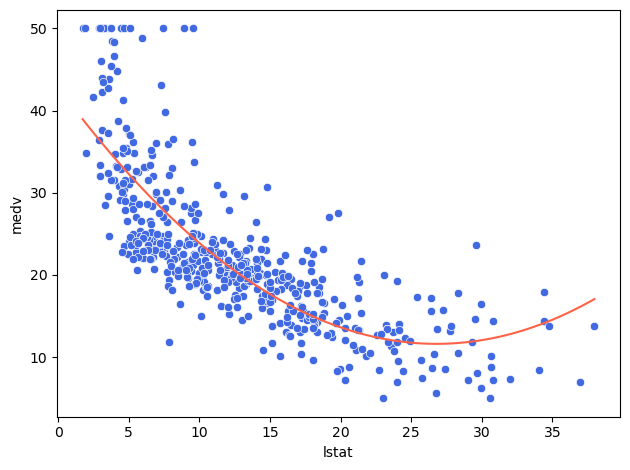

In [15]:
beta_0 = model.params["const"]
beta_1 = model.params["lstat"]
beta_2 = model.params["lstat_2"]

x_plot = np.linspace(X["lstat"].min(), X["lstat"].max(), 100)
y_plot = beta_0 + (beta_1 * x_plot) + (beta_2 * x_plot ** 2)

sb.scatterplot(x=X["lstat"], y=y, color="royalblue")
plt.plot(x_plot, y_plot, color="tomato")
plt.tight_layout()
plt.show()

#### Modelo polinimial e com termo de interação

In [16]:
X = df.loc[:, ["rm", "lstat"]].copy()
X["rm_lstat"] = X["rm"] * X["lstat"]
X["lstat_2"] = X["lstat"]**2

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     357.5
Date:                Sat, 17 Jan 2026   Prob (F-statistic):          3.14e-145
Time:                        17:22:02   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3008.
Df Residuals:                     501   BIC:                             3029.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.0357      5.319     -4.894      0.0

Aumento não siginificativo em R2 e diminuição de R2 ajustado, além de p-valor alto para lstat_2, indicando que a adição dessa feature no modelo não é relevante.

In [17]:
beta_0 = model.params["const"]
beta_1 = model.params["rm"]
beta_2 = model.params["lstat"]
beta_3 = model.params["rm_lstat"]
beta_4 = model.params["lstat_2"]

rm_grid, lstat_grid = np.meshgrid(
    np.linspace(X["rm"].min(), X["rm"].max(), 100),
    np.linspace(X["lstat"].min(), X["lstat"].max(), 100),
)
rm_lstat_grid = rm_grid * lstat_grid

Z = beta_0 + (beta_1 * rm_grid) + (beta_2 * lstat_grid) + (beta_3 * rm_lstat_grid) + (beta_4 * lstat_grid ** 2)

fig = px.scatter_3d(
    df,
    x="rm",
    y="lstat",
    z="medv",
    color="medv",
    color_continuous_scale="Viridis",
    opacity=0.8,
)
fig.update_traces(marker=dict(size=5))


fig.add_trace(
    go.Surface(
        x=rm_grid,
        y=lstat_grid,
        z=Z,
        opacity=0.5,
        showscale=False
    )
)

fig.update_layout(
    scene=dict(
        xaxis_title="rm",
        yaxis_title="lstat",
        zaxis_title="medv"
    )
)

fig.show()

alteração na geoemtria não relevante.